In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib notebook

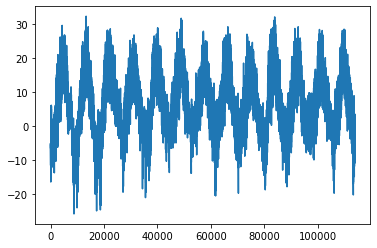

In [30]:
#Datapunkter
Td = np.loadtxt('STOCKHOLMARLANDA.dat') #Temperaturen = y-axeln
plt.figure()
plt.plot(Td)

In [4]:
def func(c, t):
    T = c[0] + c[1]*t + c[2]*np.sin((2*np.pi*t)/(365*24)) + c[3]*np.cos((2*np.pi*t)/(365*24))
    return T

Td = np.loadtxt('STOCKHOLMARLANDA.dat')
t = np.arange(0,len(Td),1)
y = Td

M = np.array([np.ones(np.shape(Td)), t, np.sin((2*np.pi*t)/(365*24)), np.cos((2*np.pi*t)/(365*24)) ]).T

c = np.linalg.solve(M.T @ M,M.T @ y)

In [27]:
t

array([     0,      1,      2, ..., 113949, 113950, 113951])

In [28]:
c

array([ 6.74680977e+00,  5.44574473e-06, -3.79289571e+00, -9.33268244e+00])

<IPython.core.display.Javascript object>


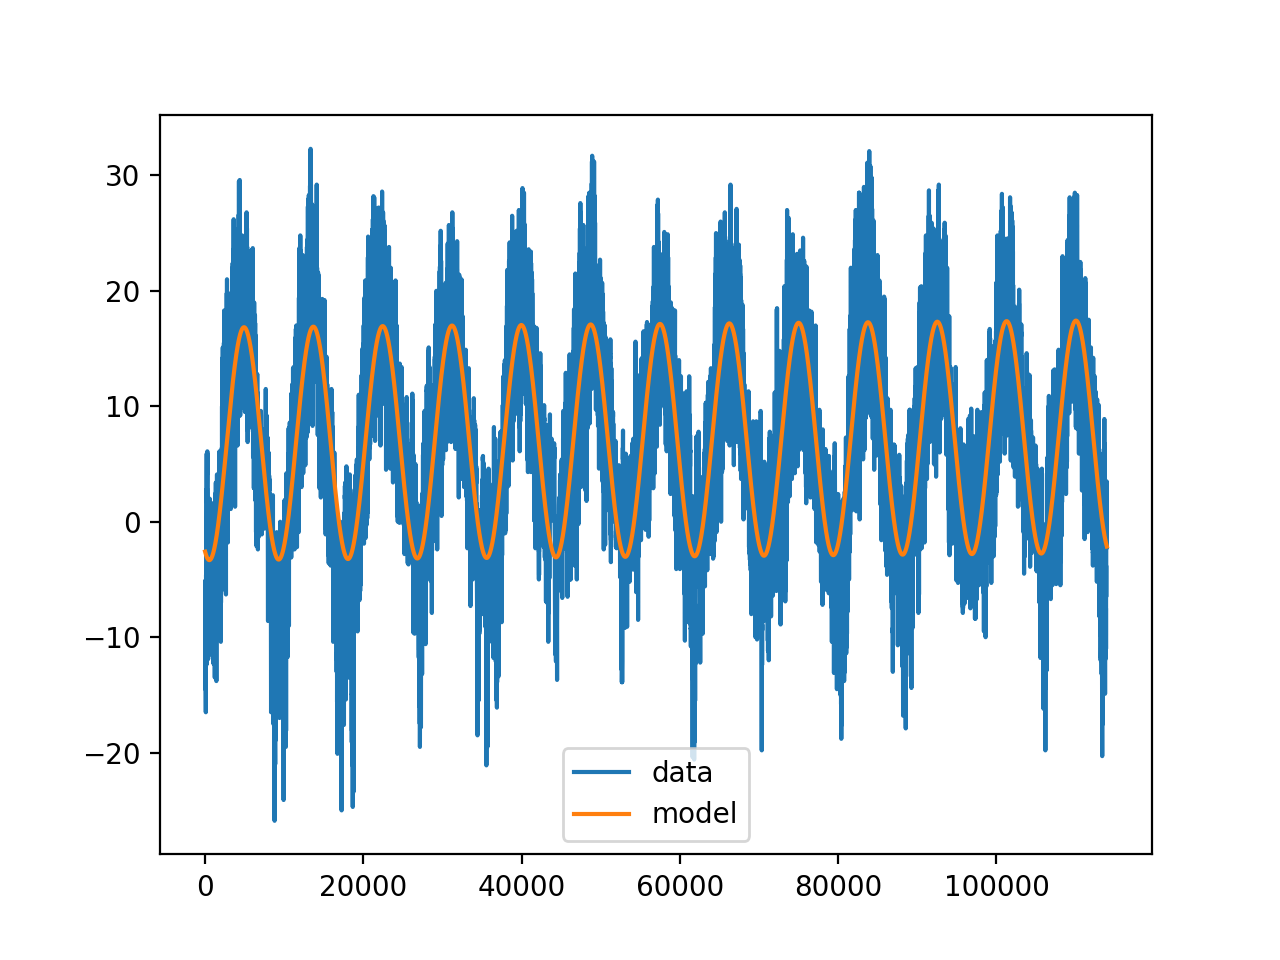

In [72]:
plt.figure()
plt.plot(Td,label='data')
plt.plot(func(c,t),label='model')
plt.legend()

In [39]:
A0 = c[2]

A1 = c[3]

print(A0, A1)

-3.7928957100252125 -9.332682440438715


In [55]:
omega = (2*np.pi)/(365*24)

ts = (np.arctan(-A1/A0))/omega
print(ts) #fasförskjutningen 

-1651.8119323028434


In [56]:
c3 = A0/(np.cos(omega*ts))
print(c3) #amplituden

-10.07397733773512


In [57]:
A1 = (-c3)*np.sin(omega*ts)
print(A1)

-9.332682440438713


In [58]:
A0 = c3*np.cos(omega*ts)
print(A0)

-3.7928957100252125


In [5]:
Td = np.loadtxt('STOCKHOLMARLANDA.dat')
t = np.arange(0,len(Td),1)

T_mod = func(c,t)
#n = Td - T_mod
r = np.array(Td - T_mod)
r2 = np.linalg.norm(Td - T_mod)
print(r, r2)

[-2.81412733 -3.31141469 -3.30870685 ...  2.14154535  1.44392346
  1.34629668] 1582.7128803153994
